For each practical exercise (TP), please work in groups of two or three. Then, create a private GitHub repository and add me (my GitHub is arthur-75) to your project. Finally, share the link to your project (or TP) under  Practical Exercises and make sure to choose your team name :-)
Autoencoders on Fashion MNIST
Goal:
Load and visualize the Fashion MNIST dataset.
Build an Autoencoder using convolutional layers.
Train the Autoencoder and evaluate its performance.
Extract and visualize latent space embeddings.
Reconstruct images and generate new ones.
1. Load and Visualize the Dataset
1.1: Import Necessary Libraries
Before diving into implementation, let's import the required libraries:


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

What transformations might be useful when working with images?

1.2: Prepare the Data
Load Fashion MNIST and set train=True for training data and train=False for validation data.
Apply padding to increase the image size from 28×28 to 32×32.
Convert images to tensors so they can be used in PyTorch.
Wrap the dataset in a DataLoader to allow efficient mini-batch processing

In [ ]:
# Preprocessing 
transform = transforms.xxx([
  xxx=xxx ,  # Pad 28x28 images to 32x32
  xxx=xxx ,    #Convert images to tensors
])
batch_size = xxx


In [ ]:
#load data
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=xxx, download=True)
train_loader = DataLoader(xxx, xxx, shuffle=xxx)
val_dataset = xxx.xxx(xxx, train=False, transform=xxx, download=True)
val_loader = xxx(xxxx, xxx, shuffle=xxx)

 1.3: Visualizing Sample Images
Extract a batch of images and labels from the training dataset.
Display multiple images in a grid.
Use matplotlib to plot the grayscale images.

In [ ]:
class_labels = {
    0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
    5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'
}
def plot_sample_images(loader):
    data_iter = iter(xxx)
    images, labels = next(data_iter)
    images = images.numpy()

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(xxx[i].squeeze(), cmap="gray")
        plt.title(xxx[xxx[i].item()])
        plt.axis("off")
    plt.tight_layout()
plt.show()
plot_sample_images(train_loader)


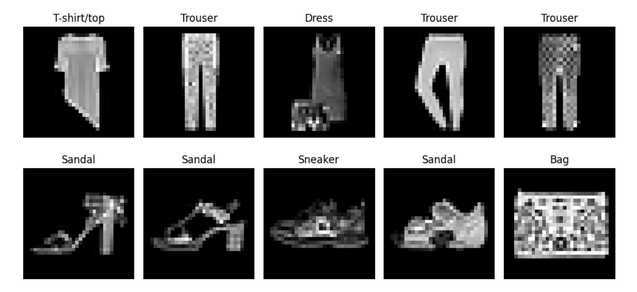

2. Build the Autoencoder
An Autoencoder consists of two parts:
Encoder: Reduces the input image to a compressed representation (latent space).
Decoder: Reconstructs the original image from the compressed representation.
2.1: Define the Autoencoder Model
We use convolutional layers for encoding and transposed convolution layers for decoding.
2.2: Define the Latent Space
The output of the encoder needs to be flattened before passing it to a fully connected layer.
This layer compresses the features into a small latent space of N dimensions, here  is set to 2 for educational purposes. ( but it can range from 16 to 1024 depending on the dimensionality of the images.)

 Question:
How does reducing the dimensionality help the model?


What happens if the latent space is too small or too large?

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, input_shape=(xxx, xxx, xxx), latent_dim=xxx):
        """
        Initialize the Autoencoder model.
        - input_shape: The shape of the input images (1, 32, 32) for grayscale images.
        - latent_dim: The number of neurons in the latent space.
        """
        super(Autoencoder, xxx).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            # First convolutional layer: Convert 1-channel input into 32 feature maps.
            nn.xxx(in_channels=1, out_channels=xxx, kernel_size=3, stride=2, padding=1),
            nn.xxx(), # acivation function 

            # Second convolutional layer: Reduce spatial dimensions further.
            nn.xxx(32, 64, kernel_size=3, stride=2, padding=1),
            nn.xxx(), #acivation function 

            # Third convolutional layer: Extract higher-level features.
            xxx  # Add another Conv2D layer with 128 filters, kernel size 3, stride 2, padding 1
            nn.xxx()  #acivation function 

        )

        # Dynamically calculate the flattened size after encoding
        flattened_size, decode_shape = self.calculate_flattened_size(self.encoder, input_shape)

        # Latent space (fully connected layer)
        self.fc = nn.Sequential(
            nn.xxx(start_dim=1),  # Flatten the encoded features
            nn.Linear(flattened_size, xxx)  # Replace xxx with the latent dimension
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(xxx, flattened_size),  # Map latent space back to the feature map
            nn.Unflatten(decode_shape[0],decode_shape[1:]),  # Reshape to match the encoded feature map

            # Transposed Convolution layers (Decoder)
            nn.xxx(xxx, 64, kernel_size=3, stride=2, padding=1, output_padding=1), # Add a conv transpose 2d
            nn.xxx(), # acivation function 


            # Next deconvolution layer
            xxx,  # Add a ConvTranspose2d layer reducing from 64 channels to 32 channels and  kernel_size=3, stride=2, padding=1, output_padding=1


            nn.xxx(), # acivation function 

            # Final deconvolution layer: Convert back to single-channel grayscale image
            nn.xxx(xxx, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.xxx()  # acivation function 
 Output values should be between 0 and 1
        )

    def calculate_flattened_size(self, model, input_shape):
        """
        Helper function to determine the flattened size after the encoder.
        - model: The encoder model.
        - input_shape: The shape of the input tensor.
        Returns:
        - The flattened size (number of features) and output shape.
        """
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Create a batch of one image
            output = model(dummy_input)
            return output.numel(), output.shape  # Return total number of elements and shape

    def forward(self, x):
        """
        Forward pass through the Autoencoder.
        - x: Input image tensor.
        Returns:
        - Reconstructed image
        - Latent space representation
        """
        x = self.xxx(x)  # Pass through the encoder
        latent = self.fc(x)  # Project into latent space
        x = self.xxx(latent)  # Decode the latent representation
        return x, latent